# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [55]:
# Build a query url
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Set up variables to store data related to weather check
city_number = 0
city_names = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Perform a weather check on each city using a series of successive API Calls
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    # Include a print log of each city as it is being processed (with the city number and city name)
    city_number = city_number +1
    print(f"Processing Record {city_number}: {city}")
    response = requests.get(url + city).json()
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_names.append(response["name"])
        # FOR TESTING (comment out next line when not testing) print out the JSON
        #pprint(response)
    except:
        print("City not found. Skipping...")
    # FOR TESTING (comment out next 2 lines when not testing) keep the set shorter than total number of cities
    #if city_number == 10:
    #    break

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1: port alfred
Processing Record 2: vaini
Processing Record 3: jishou
Processing Record 4: rawson
Processing Record 5: new norfolk
Processing Record 6: kaitangata
Processing Record 7: taolanaro
City not found. Skipping...
Processing Record 8: fare
Processing Record 9: krusevac
Processing Record 10: veere
Processing Record 11: viligili
City not found. Skipping...
Processing Record 12: ushuaia
Processing Record 13: albany
Processing Record 14: kodiak
Processing Record 15: kirakira
Processing Record 16: ribeira grande
Processing Record 17: yellowknife
Processing Record 18: bluff
Processing Record 19: mataura
Processing Record 20: busselton
Processing Record 21: shahpura
Processing Record 22: upernavik
Processing Record 23: acajutla
Processing Record 24: cape town
Processing Record 25: kavaratti
Processing Record 26: benoy
Processing Record 27: torbay
Processing Record 28: ancud
Processing Record 29: hermanus
Processi

Processing Record 235: bay roberts
Processing Record 236: te anau
Processing Record 237: ahipara
Processing Record 238: calama
Processing Record 239: korla
Processing Record 240: kropotkin
Processing Record 241: rungata
City not found. Skipping...
Processing Record 242: ambon
Processing Record 243: morondava
Processing Record 244: inirida
Processing Record 245: mata
Processing Record 246: butembo
Processing Record 247: port lincoln
Processing Record 248: tynda
Processing Record 249: madimba
Processing Record 250: trincomalee
Processing Record 251: batagay-alyta
Processing Record 252: black river
Processing Record 253: la joya
Processing Record 254: saint anthony
Processing Record 255: sabha
Processing Record 256: airai
Processing Record 257: sorong
Processing Record 258: verkhnyaya pyshma
Processing Record 259: tshane
Processing Record 260: dakar
Processing Record 261: ilulissat
Processing Record 262: sao raimundo das mangabeiras
Processing Record 263: okhotsk
Processing Record 264: hu

Processing Record 474: mayari
City not found. Skipping...
Processing Record 475: swan hill
Processing Record 476: cap malheureux
Processing Record 477: petropavlovsk-kamchatskiy
Processing Record 478: bourail
Processing Record 479: methoni
Processing Record 480: koslan
Processing Record 481: abu dhabi
Processing Record 482: sentyabrskiy
City not found. Skipping...
Processing Record 483: dabat
Processing Record 484: krasnoselkup
Processing Record 485: high level
Processing Record 486: clyde river
Processing Record 487: mergui
City not found. Skipping...
Processing Record 488: artyk
City not found. Skipping...
Processing Record 489: aswan
Processing Record 490: lucea
Processing Record 491: porto novo
Processing Record 492: port augusta
Processing Record 493: yumen
Processing Record 494: jalu
Processing Record 495: olafsvik
Processing Record 496: bam
Processing Record 497: maningrida
Processing Record 498: barabai
Processing Record 499: bandarbeyla
Processing Record 500: gamba
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
# Create DataFrame
weather_dict = {
    "City": city_names,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(data = weather_dict)

# Export the city data into a .csv
weather_data.to_csv("../output_data/cities.csv", encoding="utf-8", index=True)

# Display the DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,58.75,65,0,5.06,ZA,1629757399
1,Vaini,-21.2000,-175.2000,73.56,78,20,12.66,TO,1629757399
2,Jishou,28.3167,109.7167,76.15,99,100,0.56,CN,1629757400
3,Rawson,-43.3002,-65.1023,44.78,40,3,23.55,AR,1629757252
4,New Norfolk,-42.7826,147.0587,38.71,87,13,2.89,AU,1629757400


In [57]:
# Display meaningful statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.699437,18.023691,68.880313,72.046957,54.627826,7.793043,1.629757e+09
std,32.817322,90.234706,13.885289,21.143847,39.393891,5.421918,7.030800e+01
min,-54.800000,-179.166700,32.990000,9.000000,0.000000,0.000000,1.629757e+09
25%,-6.929300,-60.556050,58.430000,62.000000,12.000000,3.910000,1.629757e+09
50%,21.283300,20.282700,71.350000,78.000000,64.000000,6.510000,1.629757e+09
75%,48.833250,95.327750,79.025000,88.000000,95.000000,11.175000,1.629757e+09
max,78.218600,179.316700,100.870000,100.000000,100.000000,31.720000,1.629758e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [58]:
# Remove the cities where the humidity is > 100%
weather_data = weather_data.loc[weather_data["Humidity"] <= 100]

weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,19.699437,18.023691,68.880313,72.046957,54.627826,7.793043,1.629757e+09
std,32.817322,90.234706,13.885289,21.143847,39.393891,5.421918,7.030800e+01
min,-54.800000,-179.166700,32.990000,9.000000,0.000000,0.000000,1.629757e+09
25%,-6.929300,-60.556050,58.430000,62.000000,12.000000,3.910000,1.629757e+09
50%,21.283300,20.282700,71.350000,78.000000,64.000000,6.510000,1.629757e+09
75%,48.833250,95.327750,79.025000,88.000000,95.000000,11.175000,1.629757e+09
max,78.218600,179.316700,100.870000,100.000000,100.000000,31.720000,1.629758e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

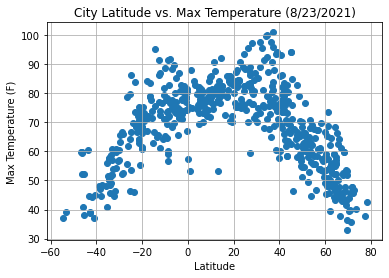

This scatter plot is analyzing any correlation between location related to the equator (in Latitude)
and the maximum temperature to show how location to the equator relates to temperature.


In [59]:
# Latitude vs. Temperature Plot
plt.figure()
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Calculate date
date_avg = weather_data["Date"].mean()
plot_date = time.gmtime(date_avg)

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Display the plot
plt.show()

# A sentence or two explaining what the code is analyzing
print("This scatter plot is analyzing any correlation between location related to the equator (in Latitude)")
print("and the maximum temperature to show how location to the equator relates to temperature.")

## Latitude vs. Humidity Plot

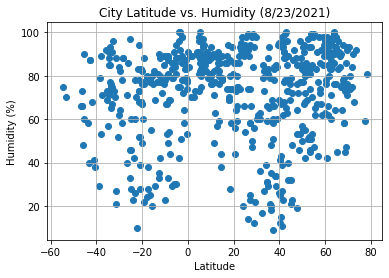

This scatter plot is analyzing any correlation between location related to the equator (in Latitude)
and the humidity of the region to show how location to the equator relates to humidity.


In [60]:
# Latitude vs. Humidity Plot
plt.figure()
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Display the plot
plt.show()

# A sentence or two explaining what the code is analyzing
print("This scatter plot is analyzing any correlation between location related to the equator (in Latitude)")
print("and the humidity of the region to show how location to the equator relates to humidity.")

## Latitude vs. Cloudiness Plot

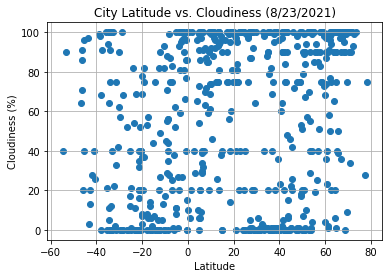

This scatter plot is analyzing any correlation between location related to the equator (in Latitude)
and the cloudiness of the region to show how location to the equator relates to cloud coverage.


In [61]:
# Latitude vs. Cloudiness Plot
plt.figure()
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Display the plot
plt.show()

# A sentence or two explaining what the code is analyzing
print("This scatter plot is analyzing any correlation between location related to the equator (in Latitude)")
print("and the cloudiness of the region to show how location to the equator relates to cloud coverage.")

## Latitude vs. Wind Speed Plot

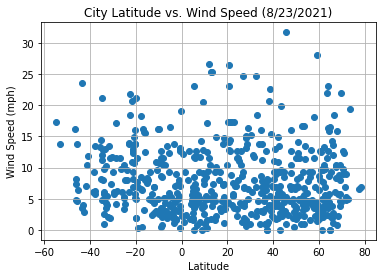

This scatter plot is analyzing any correlation between location related to the equator (in Latitude)
and the wind speed of the region to show how location to the equator relates to windiness.


In [62]:
# Latitude vs. Wind Speed
plt.figure()
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Display the plot
plt.show()

# A sentence or two explaining what the code is analyzing
print("This scatter plot is analyzing any correlation between location related to the equator (in Latitude)")
print("and the wind speed of the region to show how location to the equator relates to windiness.")

## Linear Regression

In [63]:
# Split the data into northern and southern hemisphere
north_h = weather_data.loc[weather_data["Lat"] >= 0]
south_h = weather_data.loc[weather_data["Lat"] < 0]

# A function to build the linear regression data for the plots to follow
def my_lr_func(x, y):
    # Perform a linear regression on x vs. y items
    (slope, intercept, rvalue, pvalue, stsderr) = linregress(x, y)
    print(f"The r-value is: {rvalue**2}")
    
    # Get regression values
    regress_values = x * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Return the regress_values and line_eq
    return(regress_values, line_eq)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5269998875816692


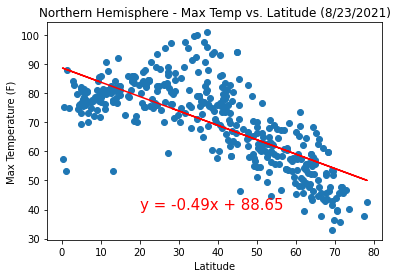

The r-value shows a moderate correlation between maximum temperature and latitude.
More specifically, we can see that the temperature goes up as you approach the equator.


In [66]:
# Perform a linear regression on maximum temperature vs. latitude in the Northern Hemisphere
regress_values, line_eq = my_lr_func(north_h["Lat"], north_h["Max Temp"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(north_h["Lat"], north_h["Max Temp"], marker="o")
plt.plot(north_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (20,40), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/NH_Max_Temp_v_Lat.png")

# Display the plot
plt.show()

# Describe any relationships noticed and any other analysis
print("The r-value shows a moderate correlation between maximum temperature and latitude.")
print("More specifically, we can see that the temperature goes up as you approach the equator.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.619541999943566


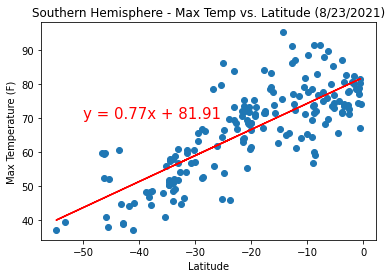

The r-value shows a moderate correlation between maximum temperature and latitude.
More specifically, we can see that the temperature goes up as you approach the equator.


In [67]:
# Perform a linear regression on maximum temperature vs. latitude in the Southern Hemisphere
regress_values, line_eq = my_lr_func(south_h["Lat"], south_h["Max Temp"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(south_h["Lat"], south_h["Max Temp"], marker="o")
plt.plot(south_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-50,70), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/SH_Max_Temp_v_Lat.png")

# Display the plot
plt.show()

# Describe any relationships noticed and any other analysis
print("The r-value shows a moderate correlation between maximum temperature and latitude.")
print("More specifically, we can see that the temperature goes up as you approach the equator.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0006481753190933954


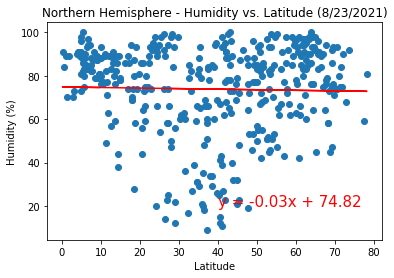

The r-value shows no correlation or a very weak correlation between humidity and latitude.
The plot shows the same, a seemingly even spread regardless of latitude.


In [69]:
# Perform a linear regression on humidity vs. latitude in the Northern Hemisphere
regress_values, line_eq = my_lr_func(north_h["Lat"], north_h["Humidity"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(north_h["Lat"], north_h["Humidity"], marker="o")
plt.plot(north_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Northern Hemisphere - Humidity vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/NH_Humidity_v_Lat.png")

# Display the plot
plt.show()

# Describe any relationships noticed and any other analysis
print("The r-value shows no correlation or a very weak correlation between humidity and latitude.")
print("The plot shows the same, a seemingly even spread regardless of latitude.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011625129705523235


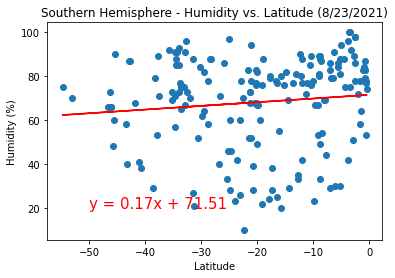

The r-value shows no correlation or a very weak correlation between humidity and latitude.
The plot shows the same, a seemingly even spread regardless of latitude.


In [70]:
# Perform a linear regression on humidity vs. latitude in the Southern Hemisphere
regress_values, line_eq = my_lr_func(south_h["Lat"], south_h["Humidity"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(south_h["Lat"], south_h["Humidity"], marker="o")
plt.plot(south_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Southern Hemisphere - Humidity vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/SH_Humidity_v_Lat.png")

# Display the plot
plt.show()

# Describe any relationships noticed and any other analysis
print("The r-value shows no correlation or a very weak correlation between humidity and latitude.")
print("The plot shows the same, a seemingly even spread regardless of latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.003826820896957404


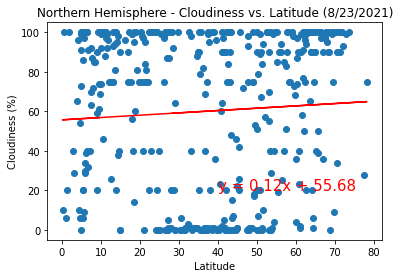

The r-value shows no correlation or a very weak correlation between cloudiness and latitude.
The plot shows the same, a seemingly even spread regardless of latitude.


In [72]:
# Perform a linear regression on cloudiness vs. latitude in the Northern Hemisphere
regress_values, line_eq = my_lr_func(north_h["Lat"], north_h["Cloudiness"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(north_h["Lat"], north_h["Cloudiness"], marker="o")
plt.plot(north_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/NH_Cloudiness_v_Lat.png")

# Display the plot
plt.show()

# Describe any relationships noticed and any other analysis
print("The r-value shows no correlation or a very weak correlation between cloudiness and latitude.")
print("The plot shows the same, a seemingly even spread regardless of latitude.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.004205948533004121


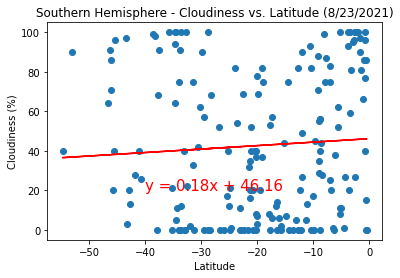

The r-value shows no correlation or a very weak correlation between cloudiness and latitude.
The plot shows the same, a seemingly even spread regardless of latitude.


In [73]:
# Perform a linear regression on cloudiness vs. latitude in the Southern Hemisphere
regress_values, line_eq = my_lr_func(south_h["Lat"], south_h["Cloudiness"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(south_h["Lat"], south_h["Cloudiness"], marker="o")
plt.plot(south_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-40,20), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/SH_Cloudiness_v_Lat.png")

# Display the plot
plt.show()

# Describe any relationships noticed and any other analysis
print("The r-value shows no correlation or a very weak correlation between cloudiness and latitude.")
print("The plot shows the same, a seemingly even spread regardless of latitude.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 2.3735809407550764e-06


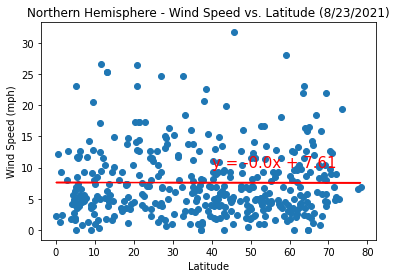

The r-value shows no correlation or a very weak correlation between wind speed and latitude.
The plot shows the same, a seemingly even spread regardless of latitude.


In [75]:
# Perform a linear regression on wind speed vs. latitude in the Northern Hemisphere
regress_values, line_eq = my_lr_func(north_h["Lat"], north_h["Wind Speed"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(north_h["Lat"], north_h["Wind Speed"], marker="o")
plt.plot(north_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/NH_Wind_Speed_v_Lat.png")

# Display the plot
plt.show()

# Describe any relationships noticed and any other analysis
print("The r-value shows no correlation or a very weak correlation between wind speed and latitude.")
print("The plot shows the same, a seemingly even spread regardless of latitude.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04027868581252005


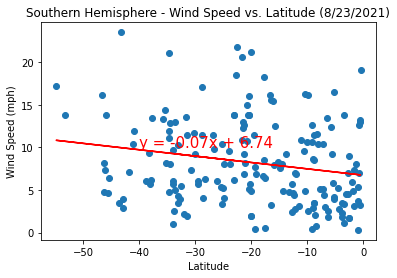

The r-value shows no correlation or a very weak correlation between wind speed and latitude.
The plot shows the same, a seemingly even spread regardless of latitude.


In [77]:
# Perform a linear regression on wind speed vs. latitude in the Southern Hemisphere
regress_values, line_eq = my_lr_func(south_h["Lat"], south_h["Wind Speed"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(south_h["Lat"], south_h["Wind Speed"], marker="o")
plt.plot(south_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-40,10), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/SH_Wind_Speed_v_Lat.png")

# Display the plot
plt.show()

# Describe any relationships noticed and any other analysis
print("The r-value shows no correlation or a very weak correlation between wind speed and latitude.")
print("The plot shows the same, a seemingly even spread regardless of latitude.")